# Regresión logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/bank/bank.csv", sep=";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape

(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
data["y"] = (data["y"]=="yes").astype(int)  #al convertir la columna 'y' de boleano a int, los Yes serán 1s y los No 0s

In [7]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [8]:
data["education"].unique() #vemos que tipos de educacion hay en los clientes

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
#agrupamos la educación básica a una sola, en vez de estar dividido según los años (basic.4y, basic.6y, basic.9y)
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

#Poenmos estas 5 categorias siguientes en un formato más bonito
data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])
data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [10]:
data["education"].unique() #vemos las modificaciones que hemos realizado

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [11]:
data["y"].value_counts() #vemos que 3668 no compran el producto (y=0/NO) y 451 si (y=1/Yes)

0    3668
1     451
Name: y, dtype: int64

In [12]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [13]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

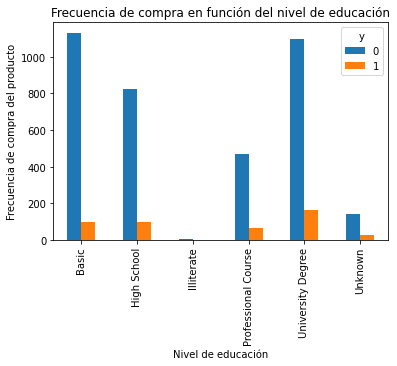

In [14]:
%matplotlib inline
#realizamos un crosstab para que cruce education e 'y'(compra si/no) y lo representamos en un plot tipo bar
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

y            0    1
marital            
divorced   403   43
married   2257  252
single     998  155
unknown     10    1


Text(0, 0.5, 'Proporción de clientes')

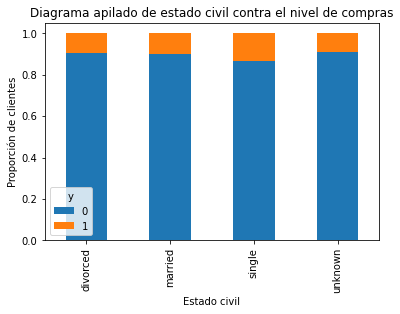

In [15]:
#creamos una tabla que cruce marital y compra (si/no)
table=pd.crosstab(data.marital, data.y)
print(table)

table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) #que cada columna quede dividida por la suma de las filas(para que quede escalada entre 0 y 1)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

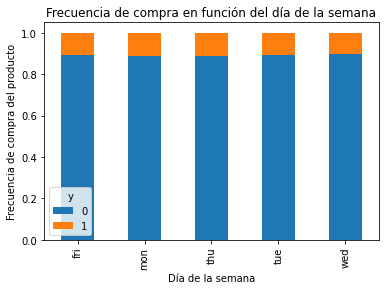

In [16]:
%matplotlib inline
table= pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) #escalamos como antes de 0 a 1
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

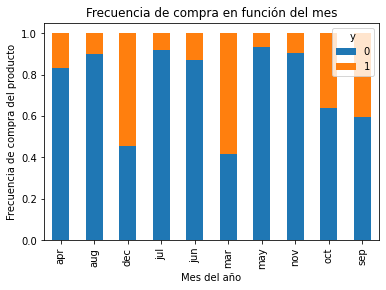

In [17]:
%matplotlib inline
table= pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

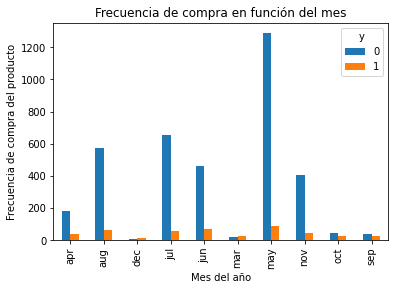

In [18]:
%matplotlib inline
table.plot(kind="bar", stacked=False)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

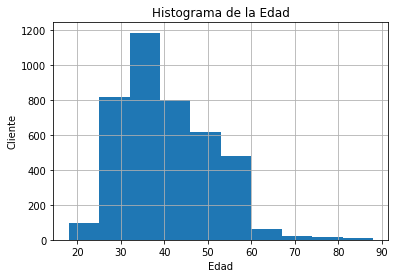

In [19]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

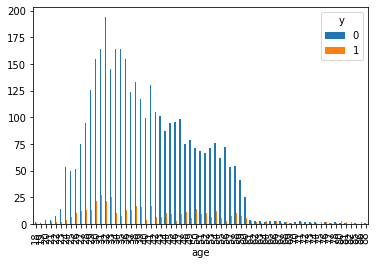

In [20]:
pd.crosstab(data.age, data.y).plot(kind="bar")

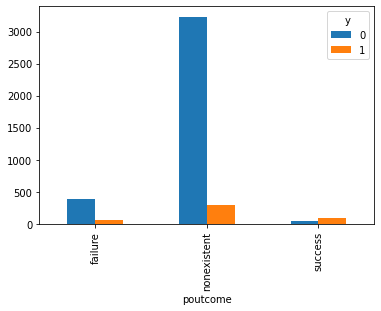

In [21]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar") #poutcome del DF nos dice si ha repetido en funcion si ha tenido exito anteriormente o no al comprar ese producto fiunanciero

### Conversión de las variables categóricas a dummies

In [22]:
type('month')

str

In [23]:
categories = ["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
for category in categories: #vamos recorriendo categories
    cat_list = "cat" + "_" + category #añadimos el prefijo cat_ a la categoria, aunque realmente usaremos el cat_dummies de abajo
    cat_dummies = pd.get_dummies(data[category], prefix=category) #creamos la dummy para cada variable elegida
    data_new = data.join(cat_dummies) #creamos un data con los nuevos nombres para las dummies
    data = data_new
data_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0


**Ahora eliminamos las columnas que no nos hacen falta(las que están en categories)**

In [24]:
data_vars = data.columns.values.tolist()
data_vars

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_Unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 '

In [25]:
to_keep = [v for v in data_vars if v not in categories] #nos quedamos con las variables(v) que no están dentro de categories
to_keep = [v for v in to_keep if v not in ["default"]] #quitamos la columna default porque no le gusta a python ese nombre y da problemas

In [26]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [27]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y'] #variable a predecir
X = [v for v in bank_data_vars if v not in Y] #separo la variable Y del resto para crear la variable X(variables predictoras)

### Selección de rasgos para el modelo

In [28]:
n = 12

In [29]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression(solver='liblinear')

In [31]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel()) #bank_data[Y] esta en fila y lo pasamos a columna con ravel()

In [32]:
print(rfe.support_) #nos dice que variables se quedarán dentro

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
  True False False False False False False  True False  True]


In [33]:
print(rfe.ranking_) #parecido a rde.support_, nos da un ranking de cuáles son las variables mas probables para quedarse en el modelo(=1) y las siguioentes en orden ascendente

[34 41 18 42  1 14 27 25  1 38 22  3  1 35  2 36  1  5 30 33 12 44 19 40
 31 47 26 13 46 21 32  8 20  6 10 15  9 23 16  4 43 24  1  1  1  1  1 17
  1 45 37 28 39 29 11  1  7  1]


In [34]:
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [35]:
list(z) #vemos el ranking y el support mejor

[('age', False, 34),
 ('duration', False, 41),
 ('campaign', False, 18),
 ('pdays', False, 42),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 38),
 ('y', False, 22),
 ('job_admin.', False, 3),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 35),
 ('job_housemaid', False, 2),
 ('job_management', False, 36),
 ('job_retired', True, 1),
 ('job_self-employed', False, 5),
 ('job_services', False, 30),
 ('job_student', False, 33),
 ('job_technician', False, 12),
 ('job_unemployed', False, 44),
 ('job_unknown', False, 19),
 ('marital_divorced', False, 40),
 ('marital_married', False, 31),
 ('marital_single', False, 47),
 ('marital_unknown', False, 26),
 ('education_Basic', False, 13),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 21),
 ('education_Professional Course', False, 32),
 ('education_University Degree', False, 8),
 ('education_U

Mirando arriba decidimos cuales van a ser nuestras variables predictoras(las de True). Y creamos un vector con ellas:

In [36]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [37]:
X = bank_data[cols] #nuestras variables predictoras definitivas
Y = bank_data["y"] #variable de salida

## Implementación del modelo logístico en Python con statsmodel.api

In [38]:
import statsmodels.api as sm

In [39]:
logit_model = sm.Logit(Y, X) #aplicamos un modelo logistico

In [40]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [41]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2020-05-28 12:20  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

* Vemos que los p-valores(P>|z|) salen pequeños excepto para el day_of_week_wed y el job_retired...se podrían quitar que no alteraría en nada el modelo 

### Implementación del modelo en Python con scikit-learn

In [42]:
from sklearn import linear_model

In [43]:
logit_model = linear_model.LogisticRegression(solver='liblinear')
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
logit_model.score(X,Y) #socre es el R^2 ajustado

0.8963340616654528

In [45]:
1-Y.mean()

0.8905074047098811

In [46]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_)))) #hacemos un dataframe uniendo las variables con sus coefcientes(hay que trasponer para que salga en columna estos ultimos)

,0,1
0,previous,[0.5076571353418516]
1,euribor3m,[-0.5464961344034411]
2,job_blue-collar,[-0.3591553622736615]
3,job_retired,[0.35603838875837096]
4,month_aug,[0.6253983085756406]
5,month_dec,[1.1822172985967758]
6,month_jul,[0.9622633626682412]
7,month_jun,[1.0543179247957934]
8,month_mar,[1.6306366297771495]
9,month_nov,[0.451957681774358]


* La variable de los coeficientes nos indica los cambios en escala logartimica, en el cociente de Probabilidades, por cada unidad de cambio en la variable. Por ejemplo: Si la variable Previous incrementa en 1 unidad, el logartimo del cociente de probabilidades *(log(P)/(1-P))*, se incremetará en medio punto. Y por lo tanto la probabilidad de compra se incrementará de forma acorde.

## Validación del modelo logístico

Entrenamiento y testing

In [47]:
from sklearn.model_selection import train_test_split  #train_test_split para el tema de entrenamiento y testing

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0) #30% para el testing, y semilla para dividir que sea aleatoria

In [49]:
lm = linear_model.LogisticRegression(solver='liblinear')
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
from IPython.display import display, Math, Latex

In [51]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [52]:
probs = lm.predict_proba(X_test) #para que nos de la probabilidad estandard

In [53]:
probs

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044409, 0.34955591],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

In [54]:
prediction = lm.predict(X_test) 

In [55]:
prediction #probabilidades menores de 0.5(el threshold)  seran 0 y mayores seran 1

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [57]:
prob = probs[:,1] #nos quedamos todas las filas y solo la primera columna
prob_df = pd.DataFrame(prob) #creamos un data frame con esa columna de probabilidades creada
threshold = 0.1 #en vez de 0.5 la linea divisora, ponemos ahora un 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [58]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [59]:
390/len(prob_df)*100

31.55339805825243

In [60]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,905
1,331


In [61]:
331/len(prob_df)*100

26.779935275080906

In [62]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,504
1,732


In [63]:
732/len(prob_df)*100

59.22330097087378

In [64]:
from sklearn import metrics #metrics,para comprobar la eficacia del modelo

In [65]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

# Validación cruzada

Consiste en repetir el experimento varias veces, partiendo los datos tantas veces como sea necesario y calcular la media aritmética obtenida de las medias de evaluación sobre las difeerentes particiones llevadas a cabo. Con esto podemos estimar la efiacia de nuestro modelo. Básicamente lo que se quiere estimar es la precisión del modelo que se quiere implementar.

La validación cruzada se requiere en muchos casos para evitar que nuestro modelo predictivo no sufra de overfitting, que no es otra cosa que cuando al modelo se le suministra un conjunto de entrenamiento, ese conjunto con el que ha sido entrenado reproduce el modelo fantásticamente bien pero no es capaz de dar una buena estimación para otro conjunto u otro dataset (conjunto de testing) a la hora de generalizar el resultado.

## 1- Método de el k-fold Cross Validation.
**1-** El conjunto de datos original se divide en $k$ particiones de las cuales una se usa como testing (rojo),  mientras que las $k-1$ se usa para entrenamiento (azúl).

**2-** El proceso anterior se repite k veces.

<img src="img/cross_validation_1.jpg" width="800" hight="500">

<img src="img/cross_validation_2.jpg" width="700">

* Es un método lento desde el punto de vista computacional ya que tiene que realizar $K$ iteraciones en vez de solo una.
* Lo normal es usar $K=10$ *(Ten fold Cross Validation)*
* Para calcular los errores $E_i$, en cada una de las iteraciones se realiza un calculo del error cometido. Sobre el conjunto de prueba se calcula el valor que nos devuelve el modelo entrenado y se lo restamos al valor original para obtener una medida de la diferencia (en el caso de regresiones)  o si ha acertado o se ha equivocado en el caso de clasificaciones. Con esos valores, cada uno de los errores cometidos en cada una de la iteraciones los sumamos todos en cada uno de ellos y los dividimos por $K$, siendo esta el número de iteraciones que se realizan. En definitiva, se hace la media aritmética de los $K$ errores cometidos al realizar el Cross Validation.

## 2- Método Random Cross Validation.

<img src="img/cross_validation_3.jpg" width="700">

* La ventaja de este método es que la división de los datos de entrenamiento y prueba no depende del número de iteraciones que se lleve a cabo.
* Desventaja: Hay algunas muestras que se quedan sin evaluar y otras se evalúan varias veces. Los subconjuntos de prueba y entrenamiento pueden llevar a solaparse en algún momento.

## 3- Método Leave one out Cross Validation (LOOCV)

* Es una simple validación cruzada. Cada conjunto de datos para el training se crea tomando todas las muestras, excepto uno de ellos, que será usado para el testing. Este procedimiento de validación cruzada no desecha muchos datos, ya que únicamente elimina una muestra del conjunto de datos para el training.

* La evaluación viene dada por el error, y en este tipo de validación cruzada el error es muy bajo, pero en cambio, a nivel computacional es muy costoso, puesto que se tienen que realizar un elevado número de iteraciones, tantas como n muestras tengamos y para cada una analizar los datos tanto para training como para el testing.

<img src="img/cross_validation_4.jpg" width="700">

* Para cada iteración solo tenemos un dato de prueba. Al final recorremos los N datos usandolos de prueba.
* Ventajas: Se suele tener un error muy bajo.
* Desventajas: Muy costoso computacionalmente hablando.
* Para calcular el error es parecido a los dos métodos anteriores. Se sigue calculando el error cometido en la clasifiación(o la regresión) del elemento o dato de prueba, pero en este caso se evaluan $N$ muestras.

<img src="img/cross_validation_5.jpg" width="700">

* Por ejemplo si queremos saber si una foto es un hombre o una mujer, y para ello podemos usar el método K-neighbours o el Super Vector Machine (SVM) .....y decir cual es mejor aplicando el Cross Validation gracias a la obtención de la tasa de error obtenida.

* Ejemplo:
    1. Si tenemos un detector que nos dice si una imagen es de un hombre o una mujer, y este utiliza 4 clasificadores binarios internos para detectarlo podemos calcular la precisión de los mismos.
    2. Tenemos 20 imagenes en cada fila (cada punto una imagen) y aplicamos el *k-fold Cross Validation*. Entonces llevariamos 4 iteraciones ($k=4$) y en cada una de ellas se usaría datos diferentes para entrenar que serían analizado por los 4 clasificadores que se tuvieran en cuenta en el modelo.
    3. Estos clasificadores evaluarían los datos de prueba, 
    4. De este modo cada una de las muestras llevadas a cabo se obtendrían 4 posibles resultados, y si hicieramos la media entre los resutados de cada uno de los clasificadores y entre las 4 iteraciones realizadas obtendriamos el valor final.

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
# Aplicamos el k-fold Cross Validation 
scores = cross_val_score(linear_model.LogisticRegression(solver='liblinear'), X, Y, scoring="accuracy", cv=10) #cv son las particiones (k=10), y accuracy para que mida la eficacia del modelo

In [68]:
scores

array([0.90533981, 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.8907767 , 0.88807786])

In [69]:
scores.mean()

0.8941475917133207

# Matrices de Confusión y Curvas ROC (FPR vs TPR)

En cualquier modelo de clasificación queremos validar que el modelo es correcto comparando el resultado real con el resultado elaborado por la predicción del mismo. Existen varios modos de hacerlo, pero el más famoso es con las **curvas ROC (Receiver Operating Characteristic)**:
    
   * Una Curva ROC es una herramienta gráfica que nos sirve para entender el funcionamiento y la eficiencia que tiene un modelo.

<img src="img/matriz_confusion_1.jpg" width="700">

<img src="img/matriz_confusion_2.jpg" width="600">


* **Verdadero Positivo (TP):** Predicción correcta del positivo. Era positivo y la predicción ha sido positiva.
* **Falso Negativo (FN):** Predicción incorrecta del positivo. Era positivo y la predicción ha sido negativa.
* **Falso Positivo (FP):** Predicción incorrecta del negativo. Era negativo y la predicción ha sido positiva.
* **Verdadero Negativo (TN):** Predicción correcta del negativo. Era negativo y la predicción ha sido negativa.


* **Número de positivos reales:** TP+FP
* **Número de negativos reales:** FN+TN
* **Número de predicciones correctas:** TP+TN
* **Número de predicciones incorrectas:** FP+FN


* **Sensibilidad (TPR):** TP/(TP+FP) --> (**Precision**, proporción de identificaciones positivas que fue realmente correcta) 
* **Especifidad (TNR):** TN/(TN+FN) --> (Ratio de Verdaderos Negativos)
* **False Discovery Rate (FDR):** FP/(TP+FP)
* **False Positive Rate (FPR):** FP/(TN+FP)
* **Recall:** TP/(TP+FN) --> (que proporción de positivos reales se identificó correctamente)
* **Exactitud (Accurancy):** (TN+TP)/(TP+FP+FN+TN) = Nº de predicciones correctas/ Nº Total de predicciones

<img src="img/curva_ROC.jpg" width="750">

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0) #30% para testear

In [71]:
lm = linear_model.LogisticRegression(solver='liblinear')
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
probs = lm.predict_proba(X_test)

In [73]:
prob=probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.045371,0,0
1,0.162373,1,0
2,0.067554,0,0
3,0.062144,0,0
4,0.041582,0,0


In [74]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [75]:
TN=confusion_matrix[0][0] #verdaderos negativos
TP=confusion_matrix[1][1] #verdaderos positivos
FN=confusion_matrix[0][1] #falsos negativos
FP=confusion_matrix[1][0] #falsos positivos

In [76]:
sens = TP/(TP+FN) #sensibilidad (TPR)
sens

0.21025641025641026

In [77]:
espc_1 = 1-TN/(TN+FP) #1-TNR
espc_1

0.047281323877068515

In [78]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds: #recorremos diferentes thresholds
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [79]:
sensitivities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6475409836065574,
 0.5163934426229508,
 0.45901639344262296,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.11475409836065574,
 0]

In [80]:
especifities_1

[1,
 0.7782764811490126,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.22621184919210058,
 0.12387791741472176,
 0.1077199281867145,
 0.07181328545780974,
 0.06463195691202872,
 0.02333931777378817,
 0.013464991023339312,
 0]

In [81]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

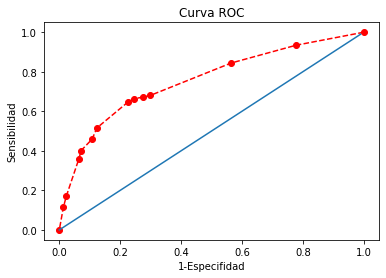

In [82]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)] #para la diagonal eje x
y=[i*0.01 for i in range(100)] #para la diagonal eje y
plt.plot(x,y) #dibujamos la diagonal(azul)
plt.xlabel("1-Especifidad") #Media de Falsos Positivos (FPR)
plt.ylabel("Sensibilidad") #Media de verdadedors positivos(TPR)
plt.title("Curva ROC")

**Cosas a tener en cuenta en este tipo de representaciones:**
* Incrementar la sensibilidad, hará bajar la especifidad.
* Cuanto mejor se ajuste la curva al borde superior izquierdo, mejor es la predicción del modelo.
* Como más cerca se encuentre de la diagonal, peor es el modelo.
* Cuanto mayor sea el área bajo la curva, mejor será la predicción.

In [83]:
from sklearn import metrics
from ggplot import *

ModuleNotFoundError: No module named 'ggplot'

In [ ]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [ ]:
df = pd.DataFrame({
    "esp":espc_1,
    "sens":sensit
})

In [ ]:
df.head()

In [ ]:
ggplot(df, aes(x="esp", y="sens")) +geom_line() + geom_abline(linetype="dashed")+xlim(-0.01,1.01)+ylim(-0.01,1.01)+xlab("1-Especifidad")+ylab("Sensibilidad")

In [ ]:
auc = metrics.auc(espc_1, sensit)
auc

In [ ]:
ggplot(df, aes(x="esp", y="sens")) + geom_area(alpha=0.25)+geom_line(aes(y="sens"))+ggtitle("Curva ROC y AUC=%s"%str(auc)) #'auc' es area bajo la curva